<a href="https://colab.research.google.com/github/AlexejNikolaev/cryptanalysis_final_project/blob/lab_work/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lab_work%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика данных с помощью `pandas` и `matplotlib`

**Дедлайн:** 8 апреля 23:59

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [1]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 113MB/s]


Начнем с необходимых приготовлений.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [4]:
coins = pd.read_csv("coins.csv")

Посмотрим что получилось

In [5]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [6]:
symbols = coins.symbol.unique()
print(symbols)


['BTC' 'LTC' 'DOGE' 'VTC' 'DGB' 'DASH' 'MAID' 'XLM' 'XVG' 'USDT' 'XEM'
 'ETH' 'REP' 'DCR' 'PIVX' 'LSK' 'WAVES' 'ETC' 'NEO' 'ICN' 'ZEC' 'GNT'
 'GNO' 'ANT' 'AE' 'BAT' 'VERI' 'FUN' 'PAY' 'SNT' 'EOS' 'GAS' 'MTL' 'PPT'
 'BTM' 'OMG' 'CVC' 'ETHOS' 'BNB' 'BCH' 'ZRX' 'VEN' 'NAS' 'WTC' 'LRC' 'KNC'
 'TRX' 'MANA' 'SALT' 'ADA' 'RHOC' 'ENG' 'AION' 'KCS' 'ICX' 'POWR' 'BTG'
 'QASH' 'DRGN' 'ELF' 'SRN' 'ZIL' 'POLY' 'CENNZ' 'LOOM' 'CTXC']


In [7]:
print(len(symbols))

66


In [9]:
names = coins.name.unique()
print(names)

['Bitcoin' 'Litecoin' 'Dogecoin' 'Vertcoin' 'DigiByte' 'Dash'
 'MaidSafeCoin' 'Stellar' 'Verge' 'Tether' 'NEM' 'Ethereum' 'Augur'
 'Decred' 'PIVX' 'Lisk' 'Waves' 'Ethereum Classic' 'NEO' 'Iconomi' 'Zcash'
 'Golem' 'Gnosis' 'Aragon' 'Aeternity' 'Basic Attention Token'
 'Veritaseum' 'FunFair' 'TenX' 'Status' 'EOS' 'Gas' 'Metal' 'Populous'
 'Bitmark' 'OmiseGO' 'Civic' 'Ethos' 'iCoin' 'Binance Coin' 'Bitcoin Cash'
 'Bytom' '0x' 'VeChain' 'Nebulas' 'Waltonchain' 'Loopring' 'KingN Coin'
 'TRON' 'Decentraland' 'Kyber Network' 'SALT' 'Cardano' 'RChain' 'Enigma'
 'Aion' 'KuCoin Shares' 'ICON' 'Power Ledger' 'Bitcoin Gold' 'Bitgem'
 'QASH' 'Dragonchain' 'aelf' 'SIRIN LABS Token' 'Zilliqa' 'Polymath'
 'Centrality' 'Loom Network' 'Cortex']


In [10]:
print(len(names))

70


Всего в датасете 66 различных символов монет и 70 различных имён монет. Заметим, что есть разные монеты, имеющие одинаковые символы (например, Bitgem и Bitcoin Gold имеют символ BTG). Значит, всего в датасете представлено 70 различных монет.

### 2. За какой период данные мы имеем? (0.4 балла)

In [11]:
date_1 = coins["date"].max()
date_2 = coins["date"].min()
print("Мы имеем данные за период с", date_2, "по", date_1)

Мы имеем данные за период с 2013-04-28 по 2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [12]:
coins.isnull().sum()

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

Да, есть пропуски в столбцах со средней ценой монеты за торговый день; количеством транзакций в сети; объёмом монет, переведённых между адресами в сети данной монеты; и количеством адресов, совершавших в данный день транзакции в сети данной монеты. Эти пропуски скорее всего вызваны техническими неполадками, связанными с работой биржи.

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [13]:
coins[coins['price'] == coins['price'].max()]

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
25971,2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


In [14]:
coins[coins['high'] == coins['high'].max()]

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
25971,2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


Максимальная цена была у монеты Bitcoin 17.12.2017 года. Она была равна 19475.8 долларов, а самая высокая цена монеты в течение торгового дня была равна 20089 долларов.

### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

In [19]:
summcap = {}
for i in names:
  summcap[i] = coins.loc[coins['name'] == i, 'market'].sum()

max_summcap = max(summcap.values())
min_summcap = min(summcap.values())
for key in summcap:
  if summcap[key] == max_summcap:
    print("Самая высокая суммарная капитализация у монеты", key, "Она равна", summcap[key])
  if summcap[key] == min_summcap:
    print("Самая низкая суммарная капитализация у монеты", key, "Она равна", summcap[key])

Самая высокая суммарная капитализация у монеты Bitcoin Она равна 57439466431000.0
Самая низкая суммарная капитализация у монеты KingN Coin Она равна 10608251.0


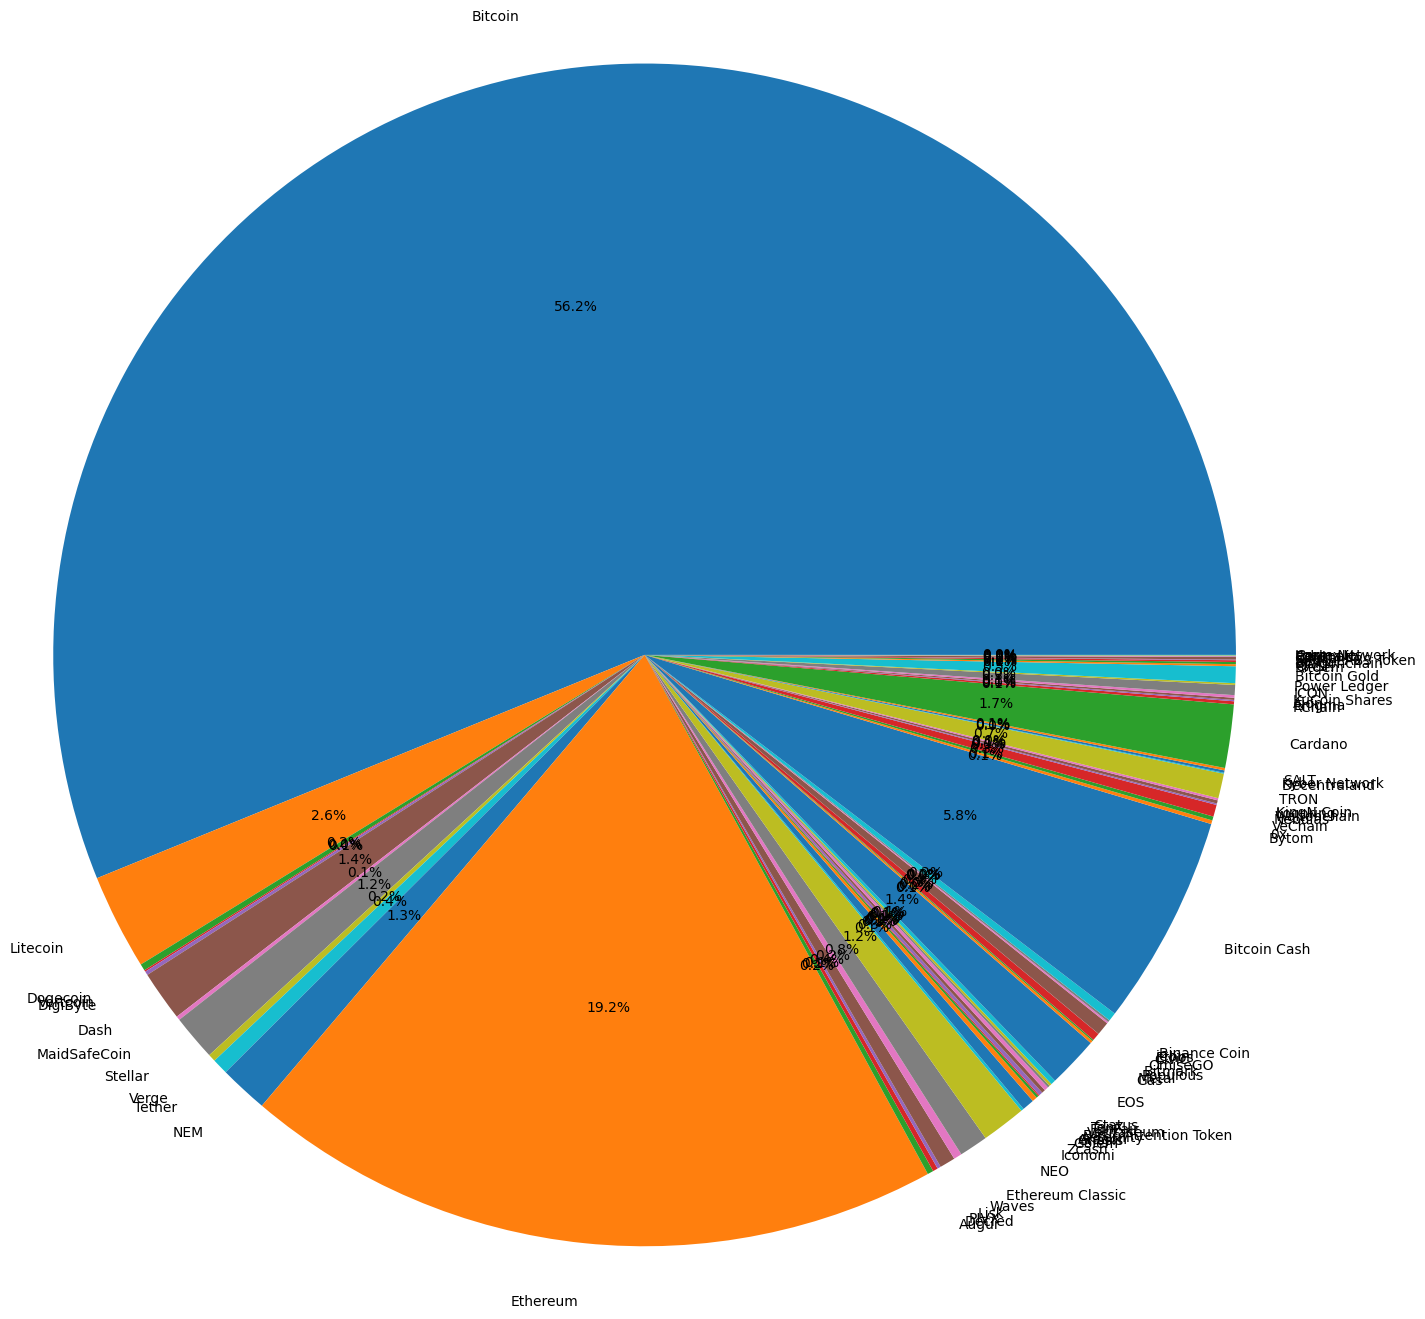

In [21]:
df_summcap = pd.DataFrame(list(summcap.items()), columns = ['Name', 'Capitalization'])
plt.pie(
    df_summcap["Capitalization"],
    labels = list(df_summcap["Name"]),
    radius = 4,
    autopct = '%1.1f%%'
)
plt.show()

Мы построили круговую диаграмму с долями, сделав DataFrame из словаря с суммарной капитализацией.

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [34]:
pip install mplfinance

In [35]:
import mplfinance as mpf

In [43]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    df_symb = pd.DataFrame({"Open": coins["open"],
                            "Close": coins["close"],
                            "High": coins["high"],
                            "Low": coins["low"],
                            "Close": coins["close"],
                            "Volume": coins["volume"],
                            "Date": coins["date"],
                            "Symbol": coins["symbol"]})

    df_symb = df_symb.loc[df_symb["Symbol"] == symbol]
    df_symb = df_symb.loc[df_symb["Date"] <= end_date]
    df_symb = df_symb.loc[df_symb["Date"] >= start_date]

    df_symb["Date"] = pd.to_datetime(df_symb["Date"])

    date = df_symb["Date"].to_numpy()
    df_symb.index = date
    df_symb.index.name = "date"

    mpf.plot(df_symb,
             type = 'candle',
             style = 'yahoo',
             mav=(3,6,9),
             figratio=(3,1),
             title = symbol)

Посмотрим, что получилось:

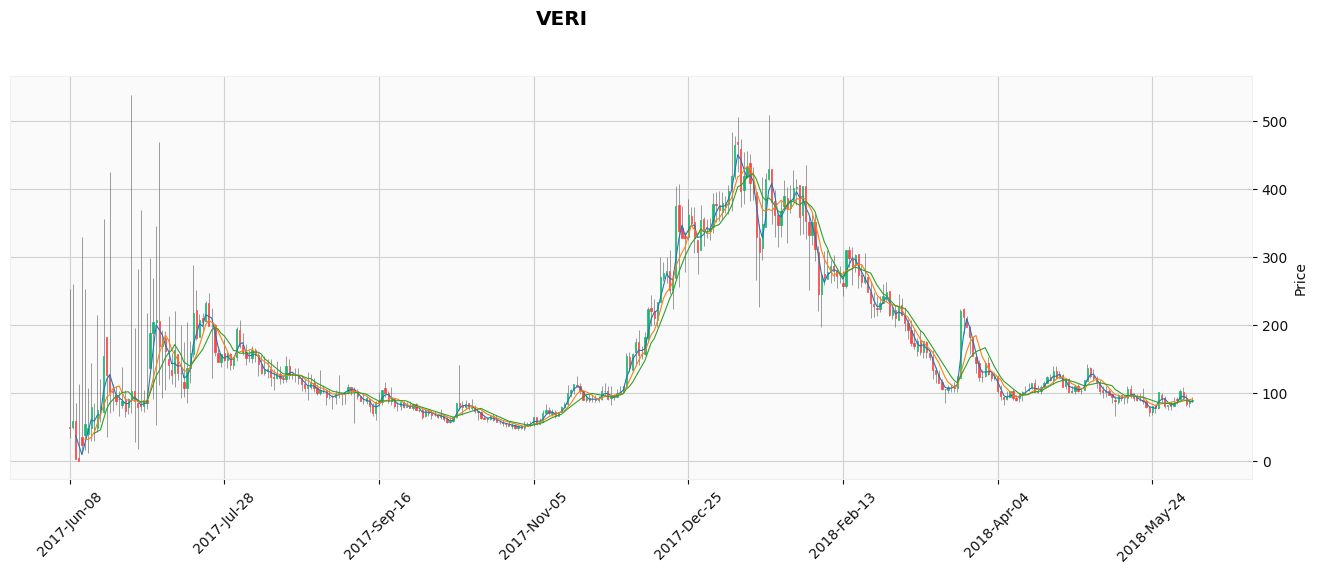

In [44]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [85]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    df_pnd = coins.loc[coins["symbol"] == symbol]
    df_pnd = df_pnd.loc[df_pnd["date"] <= end_date]
    df_pnd = df_pnd.loc[df_pnd["date"] >= start_date]

    def calculate_pnd(row):
      max_value = max(row['open'], row['close'])
      return row['high'] / max_value

    df_pnd["Pnd"] = df_pnd.apply(calculate_pnd, axis = 1)
    max_pnd = max(df_pnd["Pnd"])

    print(df_pnd.loc[df_pnd["Pnd"] == max_pnd] [["name", "date", "Pnd"]])

In [86]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

          name        date       Pnd
24860  Bitcoin  2017-11-29  1.142894


Сравните эти значения для разных монет:

Сделаем так, чтобы вместо символа у монеты было название (иначе возникнет ситуация, при которой у разных монет могут быть одинаковые символы).

In [89]:
def find_Pnd(coins, name, start_date, end_date):

  df_pnd = coins.loc[coins["name"] == name]
  df_pnd = df_pnd.loc[df_pnd["date"] <= end_date]
  df_pnd = df_pnd.loc[df_pnd["date"] >= start_date]

  def calculate_pnd(row):
    max_value = max(row['open'], row['close'])
    return row['high'] / max_value

    df_pnd["Pnd"] = df_pnd.apply(calculate_pnd, axis = 1)
    max_pnd = max(df_pnd["Pnd"])
    return max_pnd

    date_1 = '2017-06-01'
    date_2 = '2018-06-01'
    pnd = {}
    for i in name:
      pnd[i] = find_Pnd(coins, i, date_1, date_2)

In [90]:
for key in pnd:
  print(key, pnd[key])

NameError: name 'pnd' is not defined

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [80]:
def compute_roi(coins, investments, start_date, end_date):
    list1 = {}
    for i in investments:
      df = coins.loc[coins["symbol"] == i]
      df = df.loc[df["date"] == start_date]
      list1[i] = max(df["price"])

    abc = {}
    for i in investments:
      abc[i] = investments[i] / list1[i]

    list2 = {}
    for i in investments:
      df = coins.loc[coins["symbol"] == i]
      df = df.loc[df["date"] == end_date]
      list2[i] = max(df["price"])

    for i in abc:
      abc[i] = abc[i] * list2[i]

    sum_first = 0
    sum_second = 0
    for i in investments:
      sum_first += investments[i]
      sum_second += abc[i]

    roi = (sum_second - sum_first)  / sum_first
    print(round(roi *100, 5), "%")


In [81]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-3.55691 %


In [82]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

5128.3303 %


## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [94]:
def plot_bollinger_bands(coins, symbol, window, width):
    sy = coins.loc[coins["symbol"] == symbol]
    me = sy["price"].rolling(window = window).mean()
    st = sy["price"].rolling(window = window).std()

    me = me.to_numpy()
    st = st.to_numpy()
    prices = sy["price"].to_numpy()
    g1 = me + width * st
    g2 = me - width * st
    dates = pd.to_datetime(sy['date'])

    fig, ax = plt.subplots(figsize = (14, 9))
    plt.plot(dates, prices, label = "Цена")
    plt.plot(dates, me, label = "Скользящее среднее")
    plt.plot(dates, g1, label = "Верхняя граница Боллинджера")
    plt.plot(dates, g2, label = "Нижняя граница Боллинджера")
    plt.title(f"Графики для {symbol}")
    plt.xticks(rotation =90)
    plt.legend(loc = 'upper left')
    plt.show()

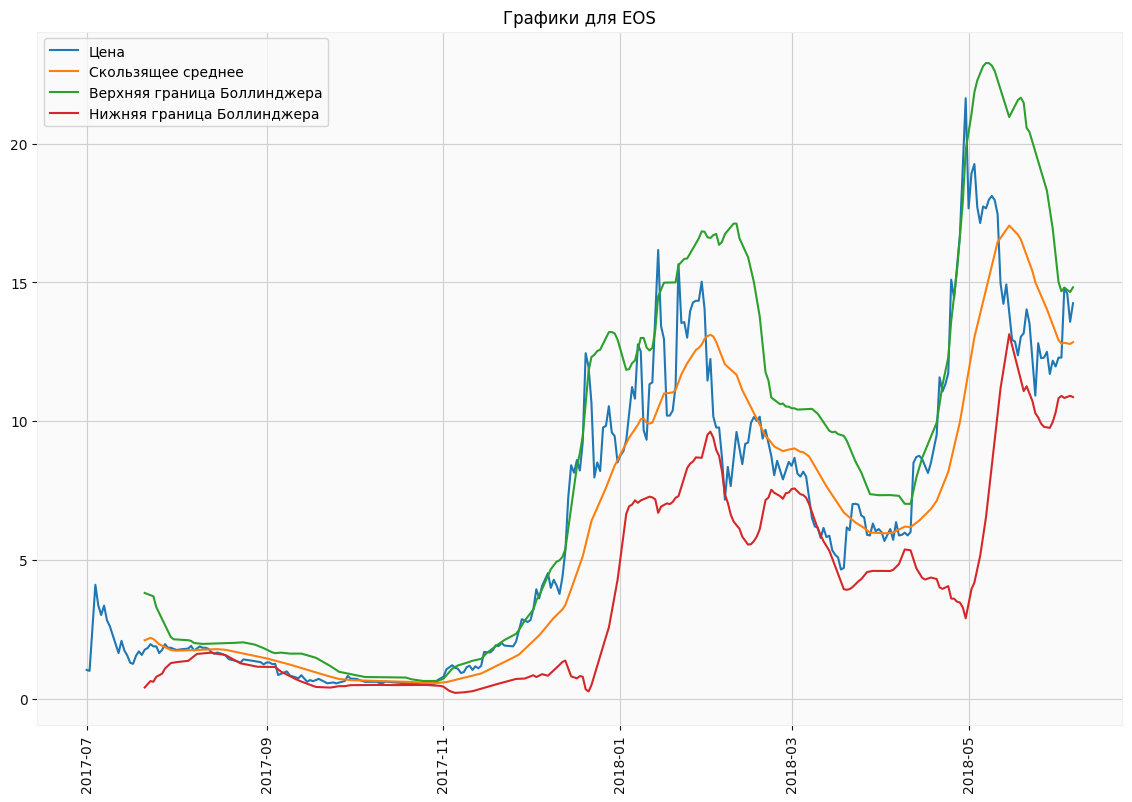

In [95]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Можно увидеть, что бывает такое, что цена находится выше верхней границы Боллинджера, однако затем она снижается, следуя этому правилу. Можно сделать вывод. что правило Боллинджера выполняется с некоторыми оговорками.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [96]:
def plot_coins_capitalizations(coins, symbols, start_date):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14, 14))
    summcap = {}

    for i in symbols:
      df_i = coins.loc[coins["symbol"] == i]
      df_i = df_i.loc[df_i["date"] >= start_date]
      summcap[i] = df_i["market"].to_numpy()

      ax1.plot(pd.to_datetime(df_i["date"], summcap[i], label = i))

    ax1.set_title(f"Капитализации монет")
    ax1.legend(loc = 'upper left')

    coins_d = coins.loc[coins["date"] >= start_date]
    all_cap = coins_d.droupby(['date'])['market'].sum().to_numpy()
    shares = {}

    for i in symbols:
     if len(summcap[i]) < len(all_cup):
       summcap[i] = np.append(np.zeros(len(all_cup) - len(summcap[i])), summcap[i])

     shares[i] = summcap[i] / all_cap
     ax2.plot(pd.to_datetime(coins_d["date"]).unique(), shares[i], label = i)

    ax2.set_title(f"Доля к общей капитализации")
    ax2.legend(loc = 'upper left')


TypeError: to_datetime() got an unexpected keyword argument 'label'

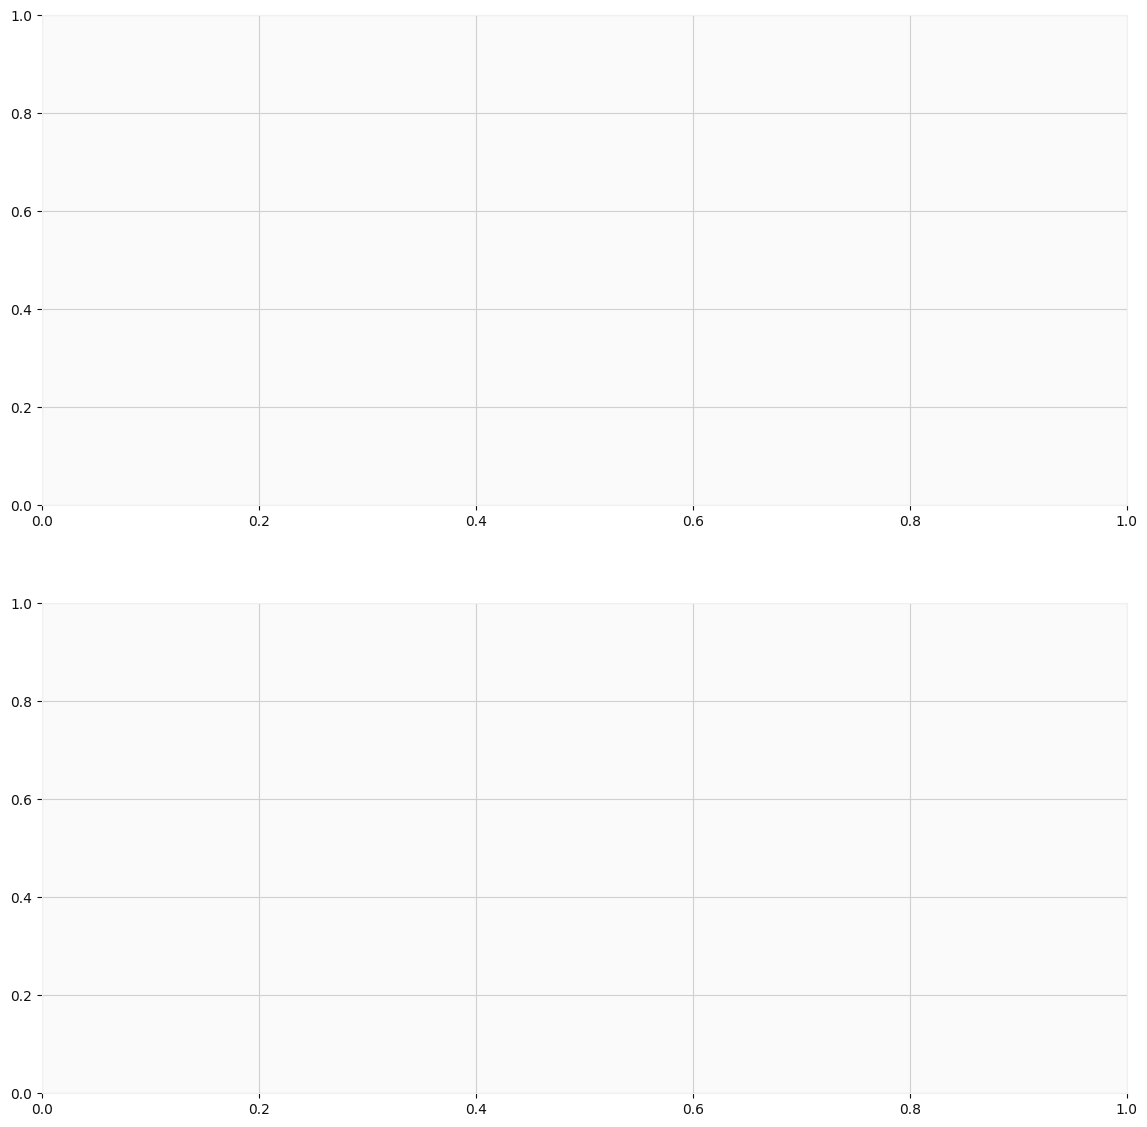

In [99]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [117]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    coinsnew = coins.loc[coins["date"] <= date]
    summcap = coinsnew.groupby(['date'])['market'].sum().to_numpy()
    listed = {}

    for symb in symbols:
      df_coin = coins[(coins['symbol'] == symb) & (coins['date'] <= date)]["market"]

      if len(df_coin) < len(summcap):
        df_coin = np.append(np.zeros(len(summcap) - len(df_coin)), df_coin)

      share = np.array(df_coin) / summcap

      mean_share = list(pd.Series(share).ewm(alpha = alpha).mean())
      listed[symb] = mean_share[-(window +1):]

      a = pd.DataFrame(listed)
      return a.corr()


In [118]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

AttributeError: 'Styler' object has no attribute 'set_precision'

Довольно интересно ещё взглянуть на 2017-12-27:

In [119]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

AttributeError: 'Styler' object has no attribute 'set_precision'

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    df_coin = coins.loc[pd.to_datetime(coins["date"]) <= end_date]
    df_coin = df_coin.loc[pd.to_datetime(df_coin["date"]) >= start_date]
    prices = df_coin["close"]
    dates = pd.to_datetime(df_coin["date"])

    lead = prices.rolling(lead_window).mean()
    lag = prices.rolling(lag_window).mean()

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14, 14))

    ax2.plot(prices, label = "Цена")
    ax2.plot(lead, label = "Ведущее среднее")
    ax2.plot(lag, label = "Запаздывающее среднее")
    ax2.legend(loc = 'upper left')
    ax2.set_title(f"Цена и скользящее среднее для {symbol}")
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Price')

    profit = prices.to_numpy()
    b  = profit[0]

    j = df_coin["close"] / df_coin["close"].shift(1).fillna(df_coin["close"])
    coeffs = [1]
    j = j.to_numpy()
    for i in range (1, len(j)):
      coeff = coeffs[i - 1] * j[i]
      coeffs.append(coeff)

    k = 1
    new_strategy = [b]
    lead = lead.to_numpy()
    lag = lag.to_numpy()
    for i in range (1, len(profit)):
      if(lead[i] - lag[i]) / float(profit[i]) >= threshold:
        k +=1
        b += profit[i]
        new_strategy.append(k * profit[i])
      else:
        new_strategy.append(k * profit[i])

      x = b * np.array(coeffs)

      ax1.plot(dates, x, label = "Купить и держать")
      ax1.plot(dates, x, label = "Наша стратегия")
      ax1.legend(loc = 'upper left')
      ax1.set_title(f'Доходности стратегий для {symbols}')




In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

Лучше использовать стратегию "купить и держать", чем инвестировать с высокой долей риска.

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.